In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

from src.cpoints import get_cpoints
from src.io import *
from src.plot import *
from src.utils import *
from config import N_POINTS_PLOT

In [2]:
device = get_device()

Device: cpu


In [3]:
df = pd.read_csv("results/problems.csv")
df

,length,total_time,n_points_x,n_points_t,n_points_rand,n_points_init,n_points_boundary,weight_residual,weight_initial,weight_boundary,...,hard_constraint,exact,collocation_points,tag,loss,loss_residual,loss_initial,loss_boundary,l2_error,l2_error_init
0,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A05_phi2,0.000025,0.000003,0.000010,1.197193e-05,tensor(0.3509),tensor(0.0352)
1,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A05_phi4,0.000024,0.000009,0.000013,2.076574e-06,tensor(0.6155),tensor(0.0532)
2,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A05_phi6,0.000129,0.000084,0.000030,1.457825e-05,tensor(0.7251),tensor(0.0696)
3,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A1_phi2,0.000006,0.000004,0.000002,5.830058e-07,tensor(0.1544),tensor(0.0127)
4,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,dir_c03_A1_phi4,0.000360,0.000094,0.000126,1.407085e-04,tensor(2.9655),tensor(0.1871)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,neu_c3_A1_phi4,0.438194,0.002650,0.387558,4.798743e-02,tensor(138.3663),tensor(10.7583)
86,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,neu_c3_A1_phi6,0.487764,0.000194,0.473596,1.397353e-02,tensor(148.9472),tensor(11.9005)
87,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,neu_c3_A2_phi2,0.224850,0.014681,0.168253,4.191675e-02,tensor(101.0817),tensor(7.0869)
88,1.0,1.0,150,150,10000,150,150,1.0,1.0,1.0,...,False,True,const,neu_c3_A2_phi4,1.727829,0.018389,1.618591,9.084859e-02,tensor(279.1763),tensor(21.9931)


In [4]:
df = pd.read_csv("results/problems.csv")
import re
df["l2_error"] = df["l2_error"].map(lambda x: float(re.findall(r"\d+\.\d+", x)[0]) / N_POINTS_PLOT**2)
df["l2_error_init"] = df["l2_error_init"].map(lambda x: float(re.findall(r"\d+\.\d+", x)[0]) / N_POINTS_PLOT)
df.columns

Index(['length', 'total_time', 'n_points_x', 'n_points_t', 'n_points_rand',
       'n_points_init', 'n_points_boundary', 'weight_residual',
       'weight_initial', 'weight_boundary', 'adapt_weights', 'layers',
       'neurons_per_layer', 'epochs', 'learning_rate', 'activation', 'c', 'a',
       'phi', 'equation', 'boundary_condition', 'hard_constraint', 'exact',
       'collocation_points', 'tag', 'loss', 'loss_residual', 'loss_initial',
       'loss_boundary', 'l2_error', 'l2_error_init'],
      dtype='object')

In [5]:
from matplotlib.pyplot import figure

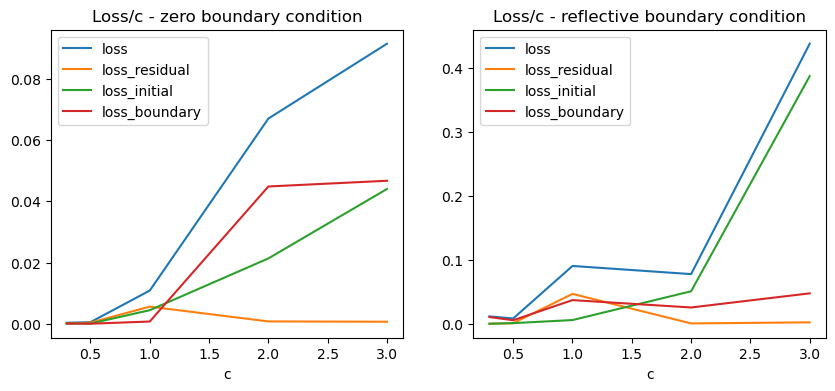

In [43]:
res_df = df[
    (df["a"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'zero')
    ]

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

res_df.plot(x = 'c', y = 'loss', ax=axes[0])
res_df.plot(x = 'c', y = 'loss_residual', ax=axes[0])
res_df.plot(x = 'c', y = 'loss_initial', ax=axes[0])
res_df.plot(x = 'c', y = 'loss_boundary', ax=axes[0])
axes[0].set_title("Loss/c - zero boundary condition")


res_df = df[
    (df["a"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'reflective')
    ]
    
res_df.plot(x = 'c', y = 'loss', ax=axes[1])
res_df.plot(x = 'c', y = 'loss_residual', ax=axes[1])
res_df.plot(x = 'c', y = 'loss_initial', ax=axes[1])
res_df.plot(x = 'c', y = 'loss_boundary', ax=axes[1])
axes[1].set_title("Loss/c - reflective boundary condition")

plt.show()
fig.savefig("plot-c.png", dpi=300, bbox_inches = 'tight')

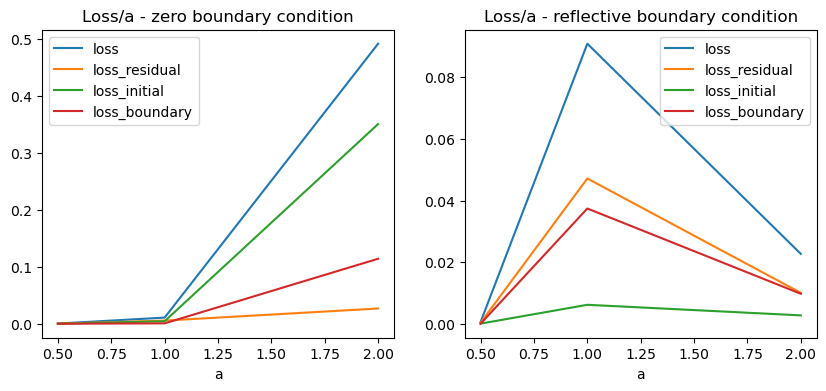

In [44]:
res_df = df[
    (df["c"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'zero')
    ]

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

res_df.plot(x = 'a', y = 'loss', ax=axes[0])
res_df.plot(x = 'a', y = 'loss_residual', ax=axes[0])
res_df.plot(x = 'a', y = 'loss_initial', ax=axes[0])
res_df.plot(x = 'a', y = 'loss_boundary', ax=axes[0])
axes[0].set_title("Loss/a - zero boundary condition")

res_df = df[
    (df["c"] == 1) &
    (df["phi"] == 4) &
    (df["boundary_condition"] == 'reflective')
    ]
    
res_df.plot(x = 'a', y = 'loss', ax=axes[1])
res_df.plot(x = 'a', y = 'loss_residual', ax=axes[1])
res_df.plot(x = 'a', y = 'loss_initial', ax=axes[1])
res_df.plot(x = 'a', y = 'loss_boundary', ax=axes[1])
axes[1].set_title("Loss/a - reflective boundary condition")

plt.show()
fig.savefig("plot-a.png", dpi=300, bbox_inches = 'tight')

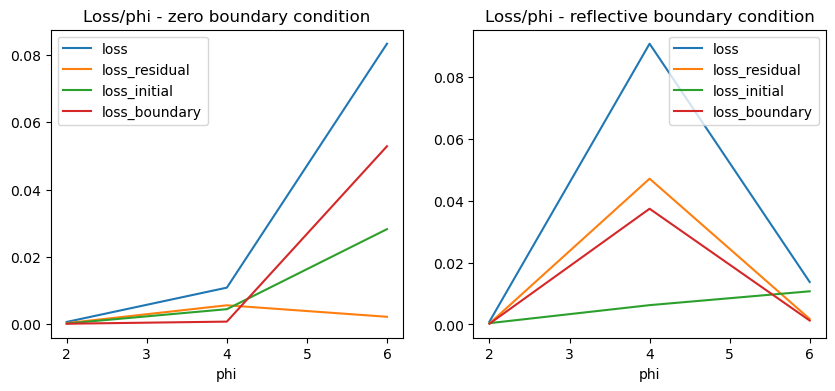

In [45]:
res_df = df[
    (df["c"] == 1) &
    (df["a"] == 1) &
    (df["boundary_condition"] == 'zero')
    ]

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

res_df.plot(x = 'phi', y = 'loss', ax=axes[0])
res_df.plot(x = 'phi', y = 'loss_residual', ax=axes[0])
res_df.plot(x = 'phi', y = 'loss_initial', ax=axes[0])
res_df.plot(x = 'phi', y = 'loss_boundary', ax=axes[0])
axes[0].set_title("Loss/phi - zero boundary condition")

res_df = df[
    (df["c"] == 1) &
    (df["a"] == 1) &
    (df["boundary_condition"] == 'reflective')
    ]
    
res_df.plot(x = 'phi', y = 'loss', ax=axes[1])
res_df.plot(x = 'phi', y = 'loss_residual', ax=axes[1])
res_df.plot(x = 'phi', y = 'loss_initial', ax=axes[1])
res_df.plot(x = 'phi', y = 'loss_boundary', ax=axes[1])
axes[1].set_title("Loss/phi - reflective boundary condition")

plt.show()
fig.savefig("plot-phi.png", dpi=300, bbox_inches = 'tight')

In [11]:
dfr = pd.read_csv("results/solved_problems1.csv")
dfr

,length,total_time,n_points_x,n_points_t,n_points_rand,n_points_init,n_points_boundary,weight_residual,weight_initial,weight_boundary,...,hard_constraint,exact,collocation_points,tag,loss,loss_residual,loss_initial,loss_boundary,l2_error,l2_error_init
0,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq1_tanh_soft_cweight_pconst,1.165708e-01,7.954242e-04,0.070138,0.045637,tensor(139.4810),tensor(4.5646)
1,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,latin,eq1_tanh_soft_cweight_platin,1.307592e-01,2.391034e-02,0.063060,0.043789,tensor(136.2521),tensor(4.0367)
2,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq1_tanh_soft_aweight_pconst,3.851273e+02,2.648378e-03,385.123993,0.000641,tensor(149.9988),tensor(12.2288)
3,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,latin,eq1_tanh_soft_aweight_platin,1.105998e+01,3.062128e-02,11.008318,0.021045,tensor(150.0271),tensor(12.0120)
4,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,True,True,const,eq1_tanh_hard_cweight_pconst,1.047766e+02,9.953842e+01,2.629197,2.609028,tensor(215.2654),tensor(0.)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,latin,eq3_sig_soft_aweight_platin,1.139636e+01,1.765462e-02,10.582096,0.796611,tensor(147.9374),tensor(11.3987)
116,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,True,True,const,eq3_sig_hard_cweight_pconst,1.481476e+03,3.619523e+02,1019.276917,100.247131,tensor(3750.3386),tensor(0.)
117,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,True,True,latin,eq3_sig_hard_cweight_platin,4.778555e+03,3.505479e+03,1204.787476,68.288376,tensor(3192.0486),tensor(0.)
118,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,True,True,const,eq3_sig_hard_aweight_pconst,4.397691e+07,4.397544e+07,888.483459,583.956177,tensor(1439.0741),tensor(0.)


In [12]:
float(re.findall(r"\d*\.\d*", "tensor(0.")[0])

0.0

In [13]:
import re
dfr["l2_error"] = dfr["l2_error"].map(lambda x: float(re.findall(r"\d*\.\d*", x)[0] + '0') / N_POINTS_PLOT**2)
dfr["l2_error_init"] = dfr["l2_error_init"].map(lambda x: float(re.findall(r"\d*\.\d*", x)[0] + '0') / N_POINTS_PLOT)
dfr.columns

Index(['length', 'total_time', 'n_points_x', 'n_points_t', 'n_points_rand',
       'n_points_init', 'n_points_boundary', 'weight_residual',
       'weight_initial', 'weight_boundary', 'adapt_weights', 'layers',
       'neurons_per_layer', 'epochs', 'learning_rate', 'activation', 'c', 'a',
       'phi', 'equation', 'boundary_condition', 'hard_constraint', 'exact',
       'collocation_points', 'tag', 'loss', 'loss_residual', 'loss_initial',
       'loss_boundary', 'l2_error', 'l2_error_init'],
      dtype='object')

In [14]:
# Activation
dfr_act = dfr[
    (dfr["adapt_weights"] == False) &
    (dfr["hard_constraint"] == False) &
    (dfr["collocation_points"] == "const")
    ]


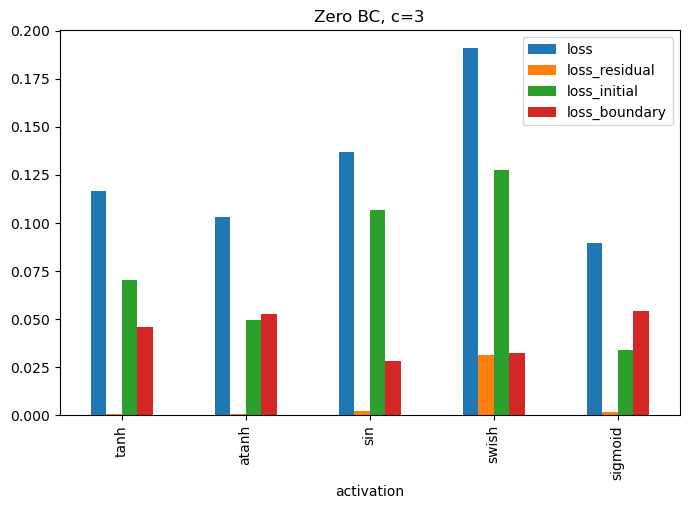

In [34]:
fig, ax1 = plt.subplots(figsize=(8, 5))

eq1 = dfr_act[dfr_act["tag"].str.startswith("eq1")]
ax = eq1.plot(kind="bar", x="activation", y=["loss", "loss_residual", "loss_initial", "loss_boundary"], ax=ax1)
ax.set_title("Zero BC, c=3")
fig.savefig("plot-zero-c3.png", dpi=300, bbox_inches = 'tight')

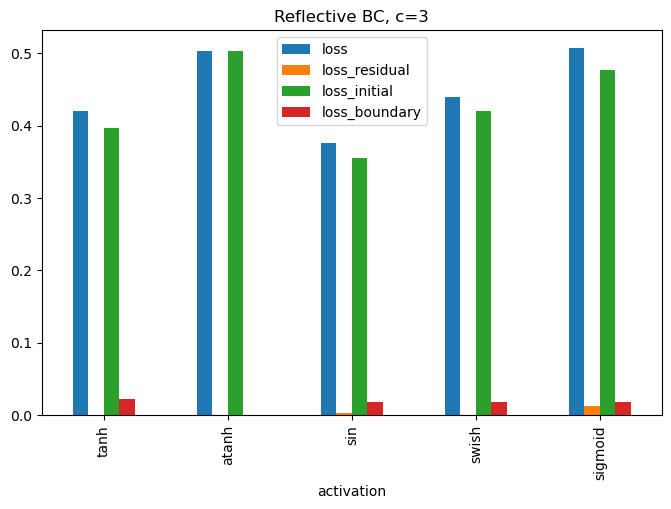

In [35]:
fig, ax1 = plt.subplots(figsize=(8, 5))

eq1 = dfr_act[dfr_act["tag"].str.startswith("eq2")]
ax = eq1.plot(kind="bar", x="activation", y=["loss", "loss_residual", "loss_initial", "loss_boundary"], ax=ax1)
ax.set_title("Reflective BC, c=3")
fig.savefig("plot-reflective-c3.png", dpi=300, bbox_inches = 'tight')

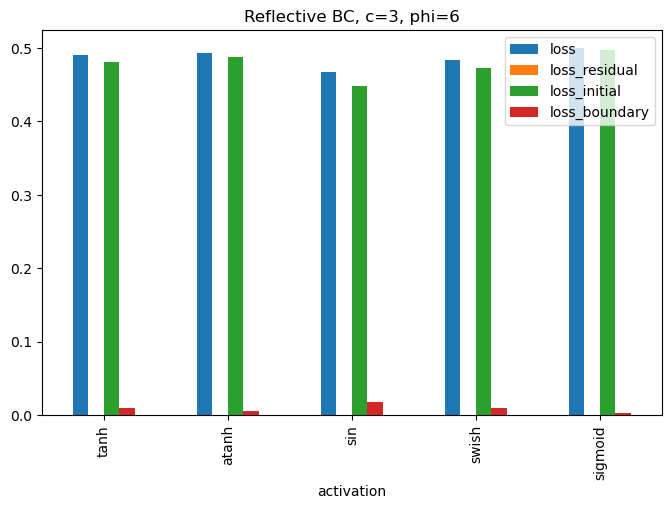

In [36]:
fig, ax1 = plt.subplots(figsize=(8, 5))

eq1 = dfr_act[dfr_act["tag"].str.startswith("eq3")]
ax = eq1.plot(kind="bar", x="activation", y=["loss", "loss_residual", "loss_initial", "loss_boundary"], ax=ax1)
ax.set_title("Reflective BC, c=3, phi=6")

fig.savefig("plot-reflective-large-c3-phi6.png", dpi=300, bbox_inches = 'tight')

In [24]:
dfr2 = pd.read_csv("results/solved_problems.csv")
dfr2

,length,total_time,n_points_x,n_points_t,n_points_rand,n_points_init,n_points_boundary,weight_residual,weight_initial,weight_boundary,...,hard_constraint,exact,collocation_points,tag,loss,loss_residual,loss_initial,loss_boundary,l2_error,l2_error_init
0,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq4_tanh,0.215499,0.071627,0.099076,0.044795,tensor(117.3986),tensor(3.8421)
1,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq4_atanh,0.103000,0.016578,0.031326,0.055096,tensor(113.0251),tensor(2.6512)
2,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq4_sin,1.419007,1.259073,0.132626,0.027307,tensor(78.5035),tensor(1.7966)
3,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq4_swish,0.130793,0.021563,0.061132,0.048098,tensor(114.3815),tensor(3.5194)
4,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq4_sig,0.088781,0.004068,0.023837,0.060876,tensor(112.3422),tensor(2.3464)
5,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq5_tanh,0.019461,0.014189,0.000706,0.004565,tensor(2.4734),tensor(0.3697)
6,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq5_atanh,0.026264,0.018741,0.003327,0.004196,tensor(7.5246),tensor(0.7269)
7,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq5_sin,0.015857,0.006110,0.008471,0.001276,tensor(17.7530),tensor(1.5321)
8,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq5_swish,0.117368,0.072984,0.008009,0.036374,tensor(13.6355),tensor(1.1261)
9,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq5_sig,0.019445,0.002602,0.011321,0.005523,tensor(13.2583),tensor(1.6274)


In [25]:
import re
dfr2["l2_error"] = dfr2["l2_error"].map(lambda x: float(re.findall(r"\d*\.\d*", x)[0] + '0') / N_POINTS_PLOT**2)
dfr2["l2_error_init"] = dfr2["l2_error_init"].map(lambda x: float(re.findall(r"\d*\.\d*", x)[0] + '0') / N_POINTS_PLOT)
dfr2.columns

Index(['length', 'total_time', 'n_points_x', 'n_points_t', 'n_points_rand',
       'n_points_init', 'n_points_boundary', 'weight_residual',
       'weight_initial', 'weight_boundary', 'adapt_weights', 'layers',
       'neurons_per_layer', 'epochs', 'learning_rate', 'activation', 'c', 'a',
       'phi', 'equation', 'boundary_condition', 'hard_constraint', 'exact',
       'collocation_points', 'tag', 'loss', 'loss_residual', 'loss_initial',
       'loss_boundary', 'l2_error', 'l2_error_init'],
      dtype='object')

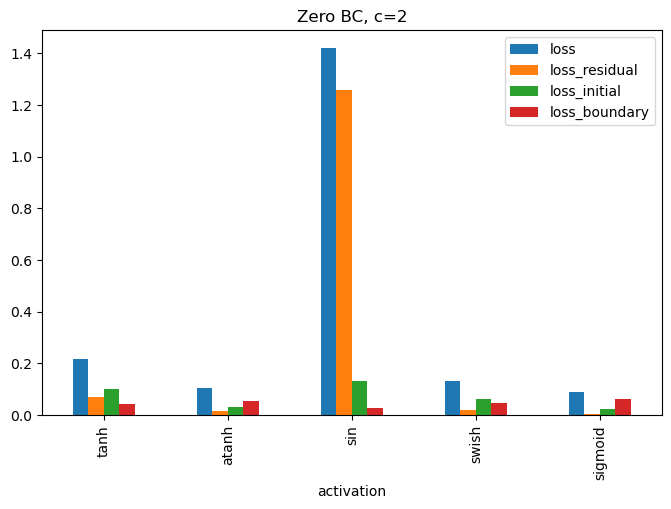

In [37]:
fig, ax1 = plt.subplots(figsize=(8, 5))

eq1 = dfr2[dfr2["tag"].str.startswith("eq4")]
ax = eq1.plot(kind="bar", x="activation", y=["loss", "loss_residual", "loss_initial", "loss_boundary"], ax=ax1)
ax.set_title("Zero BC, c=2")
fig.savefig("plot-zero-BC-c=2.png", dpi=300, bbox_inches = 'tight')

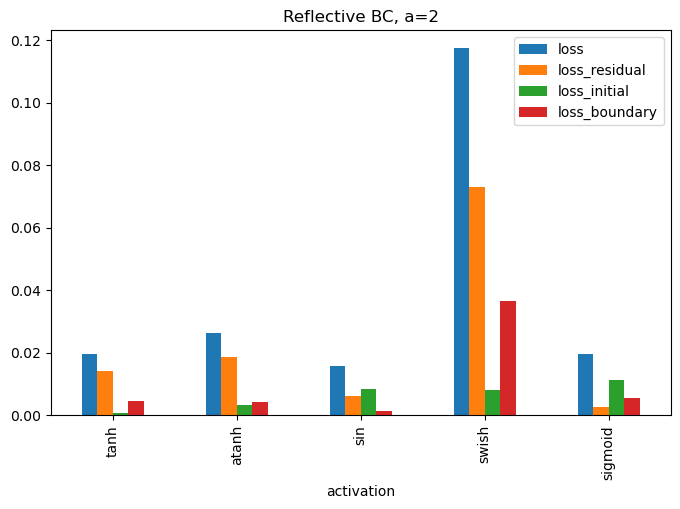

In [40]:
fig, ax1 = plt.subplots(figsize=(8, 5))

eq1 = dfr2[dfr2["tag"].str.startswith("eq5")]
ax = eq1.plot(kind="bar", x="activation", y=["loss", "loss_residual", "loss_initial", "loss_boundary"], ax=ax1)
ax.set_title("Reflective BC, a=2")
fig.savefig("plot-reflective-a2.png", dpi=300, bbox_inches = 'tight')

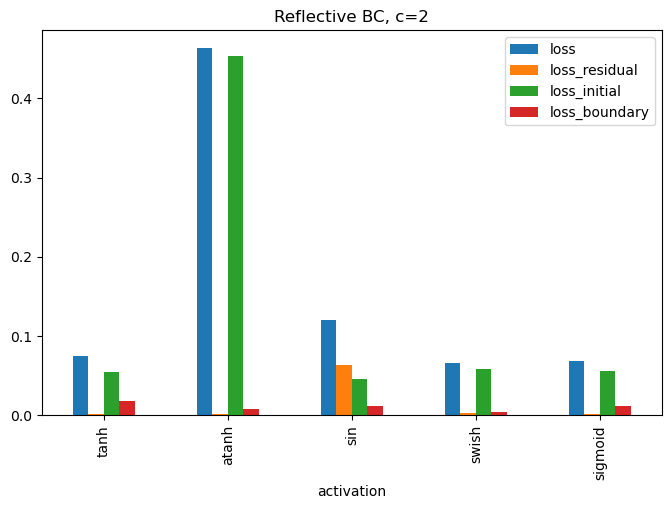

In [42]:
fig, ax1 = plt.subplots(figsize=(8, 5))

eq1 = dfr2[dfr2["tag"].str.startswith("eq6")]
ax = eq1.plot(kind="bar", x="activation", y=["loss", "loss_residual", "loss_initial", "loss_boundary"], ax=ax1)
ax.set_title("Reflective BC, c=2")
fig.savefig("plot-reflective-c2.png", dpi=300, bbox_inches = 'tight')

In [75]:
dfr[dfr["loss"] == dfr["loss"].min()]

,length,total_time,n_points_x,n_points_t,n_points_rand,n_points_init,n_points_boundary,weight_residual,weight_initial,weight_boundary,...,hard_constraint,exact,collocation_points,tag,loss,loss_residual,loss_initial,loss_boundary,l2_error,l2_error_init
32,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,False,True,const,eq1_sig_soft_cweight_pconst,0.089507,0.00153,0.033626,0.054352,135.7856,3.1548


In [66]:
dfr_hard = dfr[
    (dfr["adapt_weights"] == False) &
    (dfr["activation"] == "tanh") &
    (dfr["hard_constraint"] == False) &
    (dfr["collocation_points"] == "const") &
    (dfr["tag"].str.startswith("eq1"))
    ]
dfr_hard[["loss", "loss_residual", "loss_initial", "loss_boundary", "l2_error", "l2_error_init"]]
# dfr_hard["Change"] = [["hard_constraint"]]
# dfr_adapt = dfr[
#     (dfr["adapt_weights"] == True) &
#     (dfr["activation"] == "atanh") &
#     (dfr["hard_constraint"] == True) &
#     (dfr["collocation_points"] == "latin") &
#     (dfr["tag"].str.startswith("eq1"))
#     ]
# dfr_adapt[["loss", "loss_residual", "loss_initial", "loss_boundary"]]
# dfr_hard["Change"] = ["adapt_weights"]


,loss,loss_residual,loss_initial,loss_boundary,l2_error,l2_error_init
0,0.116571,0.000795,0.070138,0.045637,139.481,4.5646


In [21]:
dfr_none = dfr[
    (dfr["adapt_weights"] == False) &
    (dfr["activation"] == "tanh") &
    (dfr["hard_constraint"] == False) &
    (dfr["collocation_points"] == "const")
    ]

dfr_hard = dfr[
    (dfr["adapt_weights"] == False) &
    (dfr["activation"] == "tanh") &
    (dfr["hard_constraint"] == True) &
    (dfr["collocation_points"] == "const")
    ]

dfr_cpoints = dfr[
    (dfr["adapt_weights"] == False) &
    (dfr["activation"] == "tanh") &
    (dfr["hard_constraint"] == False) &
    (dfr["collocation_points"] == "latin")
    ]

dfr_adapt = dfr[
    (dfr["adapt_weights"] == True) &
    (dfr["activation"] == "tanh") &
    (dfr["hard_constraint"] == False) &
    (dfr["collocation_points"] == "const")
    ]

dfr_all = dfr[
    (dfr["adapt_weights"] == True) &
    (dfr["activation"] == "tanh") &
    (dfr["hard_constraint"] == True) &
    (dfr["collocation_points"] == "latin")
    ]

In [22]:
hard = dfr_hard[dfr_hard["tag"].str.startswith("eq1")]
hard

,length,total_time,n_points_x,n_points_t,n_points_rand,n_points_init,n_points_boundary,weight_residual,weight_initial,weight_boundary,...,hard_constraint,exact,collocation_points,tag,loss,loss_residual,loss_initial,loss_boundary,l2_error,l2_error_init
4,1.0,1.0,150,150,22500,150,150,1.0,1.0,1.0,...,True,True,const,eq1_tanh_hard_cweight_pconst,104.776649,99.538422,2.629197,2.609028,215.2654,0.0


In [23]:
# # create plot
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.35
# opacity = 0.8

# rects1 = plt.bar(index, means_frank, bar_width,
# alpha=opacity,
# color='b',
# label='Frank')

# rects2 = plt.bar(index + bar_width, means_guido, bar_width,
# alpha=opacity,
# color='g',
# label='Guido')

# plt.xlabel('Person')
# plt.ylabel('Scores')
# plt.title('Scores by person')
# plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
# plt.legend()